In [1]:
# allows to import own functions
import sys, os, re
root_project = re.findall(r'(^\S*TFM_AGM)', os.getcwd())[0]
sys.path.append(root_project)


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.ticker import PercentFormatter
from src.utils.help_func import construct_dataframe
from src.models.sir_model import sir_model



sns.set()
%matplotlib inline

In [12]:
OD = np.load('../data/interim/od_matrix.npy')
df_countries = pd.read_pickle('../data/interim/country_info_final.pickle')

# OD = np.zeros(OD.shape)

R0 = 5
omega = 0.02
Tr = 20
initial_country = 'ESP'
initial_infected = 1
limit_deaths = 100
n_closed = 0
react_time = 8
T = 730
output_mode = 1

output_1 = sir_model(df_countries, OD, R0, Tr, omega, initial_country,
                     initial_infected, limit_deaths, n_closed, react_time, T, output_mode)

df = construct_dataframe([output_1], output_mode)

R0 = df['R0'].item()
total_infected = df['total_infected'].item()
total_death = df['total_death'].item()
total_recovered = df['total_recovered'].item()

idx_country = df['idx_country'].item()
SIR_p_t = df['SIR_p_t'].item()
SIR_t = df['SIR_t'].item()
SIR_global_p_t = df['SIR_global_p_t'].item()
SIR_global_t = df['SIR_global_t'].item()
new_infected_global_t = df['new_infected_global_t'].item()
deaths_global_t = df['deaths_global_t'].item()
deaths_t = df['deaths_t'].item()

print("R0: {}".format(R0))
print("Total infected: {:,.0f}".format(total_infected))
print("Total death: {:,.0f}".format(total_death))
print("Total removed: {:,.0f}".format(total_recovered))

day_1 = np.argwhere(deaths_global_t > 0)[0, 0]
day_2 = day_1 + 14
feat2 = (SIR_global_t[1, day_2] - SIR_global_t[1, day_1]
         ) / SIR_global_t[1, day_1]
print(feat2)

feat_3 = (deaths_global_t[day_1:day_2].sum() /
          (SIR_global_t[1, day_2] - SIR_global_t[1, day_1]))
print(feat_3)

feat_4 = deaths_global_t[day_1:day_2].sum(
) / (new_infected_global_t[day_1:day_2].sum())
print(feat_4)

ratio_3 = (deaths_global_t[day_1:day_2].sum() /
               (SIR_global_t[2, day_2] - SIR_global_t[2, day_1]))

print(ratio_3)
display(df)

/disks/hdd2T/Drive/TFM_AGM/src/models/sir_model.py:193: RuntimeWarning: invalid value encountered in true_divide
  new_infected = (beta_v * SIR[:, 0] * SIR[:, 1]) / N_i
/disks/hdd2T/Drive/TFM_AGM/src/models/sir_model.py:206: RuntimeWarning: invalid value encountered in true_divide
  SIR_p = SIR / SIR.sum(axis=1).reshape(-1, 1)
/disks/hdd2T/Drive/TFM_AGM/src/models/sir_model.py:227: RuntimeWarning: invalid value encountered in true_divide
  SIR_p_t = SIR_t / SIR_t.sum(axis=1)[:, np.newaxis, :]


R0: 5
Total infected: 7,487,931,428
Total death: 150,695,300
Total removed: 7,536,623,391
11.842320261437909
0.0037944118661607453
0.00364383198621969
0.015172413793103448


,initial_country,idx_country,R0,Tc,Tr,omega,inf_power_1,inf_power_2,gradient_inf,mort_power_1,...,new_infected_t,new_infected_global_t,deaths_t,deaths_global_t,new_recovered_t,new_recovered_global_t,SIR_t,SIR_global_t,SIR_p_t,SIR_global_p_t
0,ESP,170,5,4.0,20,0.02,1078.142857,11.84232,"[245.0, 269.5, 323.5, 388.0, 465.5, 558.5, 670...",0.003644,...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[[37160148.0, 37147910.0, 37135672.0, 3712343...","[[7533159325.0, 7533162946.0, 7533162946.0, 75...","[[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0...","[[0.9999999998672535, 0.9999999998672536, 0.99..."


In [3]:
feat_3 = (deaths_global_t[day_1:day_2].sum() /
          (SIR_global_t[1, day_2] - SIR_global_t[1, day_1]))
print(feat_3)

feat_4 = deaths_global_t[day_1:day_2].sum(
) / (new_infected_global_t[day_1:day_2].sum())
print(feat_4)


feat_5 = (SIR_global_t[1, day_2] - SIR_global_t[1, day_1]) / (day_2 - day_1)
print(feat_5)

0.008201655379984952
0.009689750200017779
1898.5714285714287


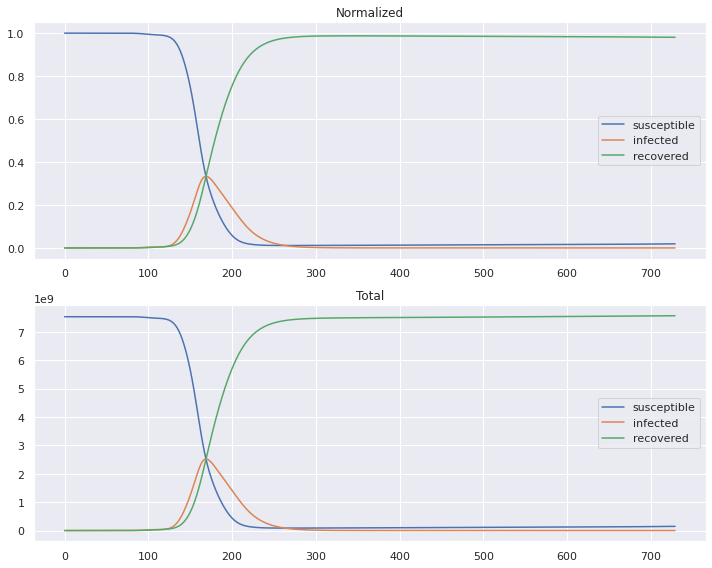

In [5]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
ax[0].plot(SIR_global_p_t[0, :], label='susceptible')
ax[0].plot(SIR_global_p_t[1, :], label='infected')
ax[0].plot(SIR_global_p_t[2, :], label='recovered')
ax[0].set_title('Normalized')
ax[0].legend()
ax[1].plot(SIR_global_t[0, :], label='susceptible')
ax[1].plot(SIR_global_t[1, :], label='infected')
ax[1].plot(SIR_global_t[2, :], label='recovered')
ax[1].set_title('Total')
ax[1].legend()
plt.tight_layout()

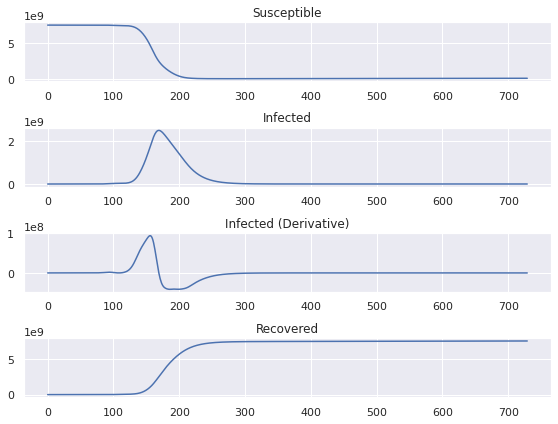

In [6]:
# los tres grupos en detalle en el instante t
fig, ax = plt.subplots(4, 1, figsize=(8, 6))
ax[0].plot(SIR_global_t[0, :])
ax[0].set_title('Susceptible')
ax[1].plot(SIR_global_t[1, :])
ax[1].set_title('Infected')
ax[2].plot(np.gradient(SIR_global_t[1, :]))
ax[2].set_title('Infected (Derivative)')
ax[3].plot(SIR_global_t[2, :])
ax[3].set_title('Recovered')
plt.tight_layout()

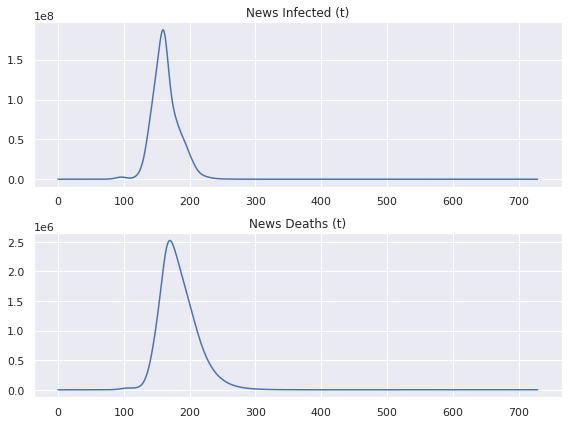

In [7]:
# nuevos infectados y muertos en el instante t
fig, ax = plt.subplots(2, 1, figsize=(8, 6))
ax[0].plot(new_infected_global_t)
ax[0].set_title('News Infected (t)')
ax[1].plot(deaths_global_t)
ax[1].set_title('News Deaths (t)')
plt.tight_layout()

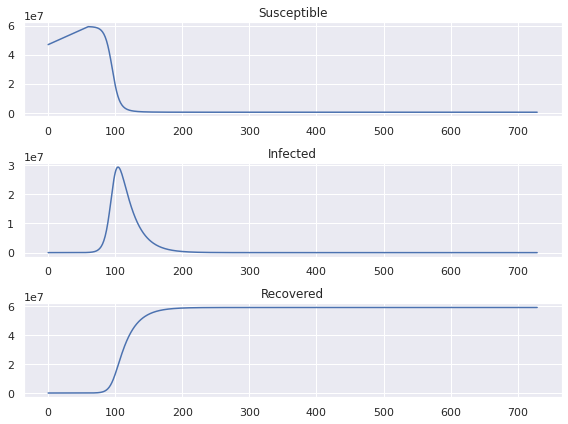

In [8]:
# los tres grupos en detalle en el instante t para el pais de inicio
fig, ax = plt.subplots(3, 1, figsize=(8, 6))
ax[0].plot(SIR_t[idx_country, 0, :])
ax[0].set_title('Susceptible')
ax[1].plot(SIR_t[idx_country, 1, :])
ax[1].set_title('Infected')
ax[2].plot(SIR_t[idx_country, 2, :])
ax[2].set_title('Recovered')
plt.tight_layout()

In [9]:
first_death = np.argwhere(deaths_global_t > 0)[0, 0]

check_deaths = first_death + 14

print(first_death, check_deaths)

38 52


In [10]:
d_1 = 7
d_2 = 14
d_3 = 21


inf_1 = new_infected_global_t[:d_1].sum()
inf_2 = new_infected_global_t[:d_2].sum()
inf_3 = new_infected_global_t[:d_3].sum()

death_1 = deaths_global_t[:d_1].sum()
death_2 = deaths_global_t[:d_2].sum()
death_3 = deaths_global_t[:d_3].sum()

a = (new_infected_global_t[:check_deaths].sum(
) - new_infected_global_t[:first_death].sum()) / new_infected_global_t[:first_death].sum()

print(f"El aumento de infectados desde la primera muerte a la segunda es {a}")
print(
    f"la proporcion de muertos/infectados 2 semanas despues de la primer muerte es {deaths_global_t[:check_deaths].sum() / new_infected_global_t[:check_deaths].sum()} ")

print("==============")


print(f"Los primeros {d_1} dias ha habido {inf_1} infectados")
print(f"Los primeros {d_2} dias ha habido {inf_2} infectados")
print(f"Los primeros {d_3} dias ha habido {inf_3} infectados")
print(f"El aumento los primeros {d_1} dias es de {inf_1 - 1 / 1}")
print(f"El aumento los primeros {d_2} dias es de {inf_2 - 1 / 1}")
print(f"Los primeros {d_1} dias ha habido {death_1} muertos")
print(f"Los primeros {d_2} dias ha habido {death_2} muertos")
print(f"Los primeros {d_3} dias ha habido {death_3} muertos")
print(
    f"La proporcion muertos/infectados a los {d_2} dias es de {death_2/inf_2}")
print(
    f"La proporcion muertos/infectados a los {d_3} dias es de {death_3/inf_3}")

print(
    f"Cuando se produce la primera muerte habia {new_infected_global_t[:first_death].sum()} infectados")
print(
    f"Dos semanas despues de la primera muerte hay {new_infected_global_t[:check_deaths].sum()} infectados")
print(
    f"la proporcion de muertos/infectados 2 semanas despues de la primer muerte es {deaths_global_t[:check_deaths].sum() / new_infected_global_t[:check_deaths].sum()} ")

El aumento de infectados desde la primera muerte a la segunda es 12.027091633466135
la proporcion de muertos/infectados 2 semanas despues de la primer muerte es 0.0033641201296715395 
Los primeros 7 dias ha habido 0.0 infectados
Los primeros 14 dias ha habido 8.0 infectados
Los primeros 21 dias ha habido 45.0 infectados
El aumento los primeros 7 dias es de -1.0
El aumento los primeros 14 dias es de 7.0
Los primeros 7 dias ha habido 0.0 muertos
Los primeros 14 dias ha habido 0.0 muertos
Los primeros 21 dias ha habido 0.0 muertos
La proporcion muertos/infectados a los 14 dias es de 0.0
La proporcion muertos/infectados a los 21 dias es de 0.0
Cuando se produce la primera muerte habia 1255.0 infectados
Dos semanas despues de la primera muerte hay 16349.0 infectados
la proporcion de muertos/infectados 2 semanas despues de la primer muerte es 0.0033641201296715395 


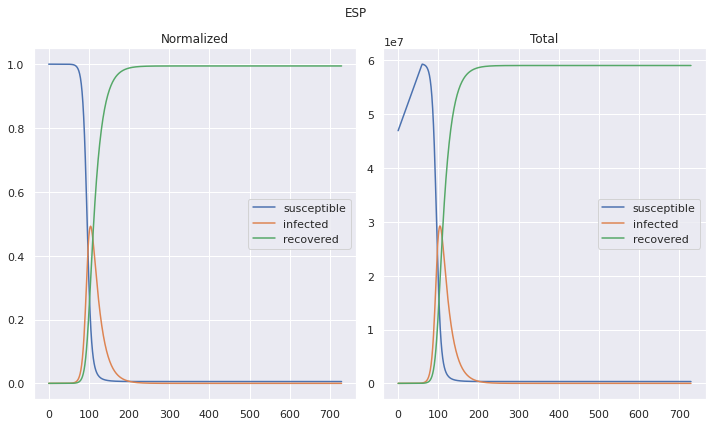

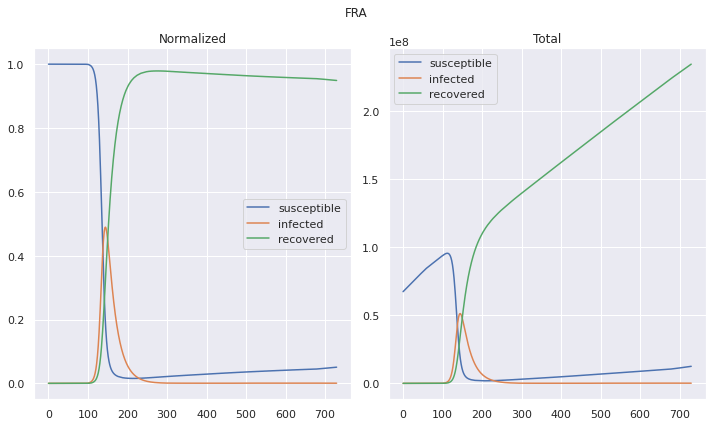

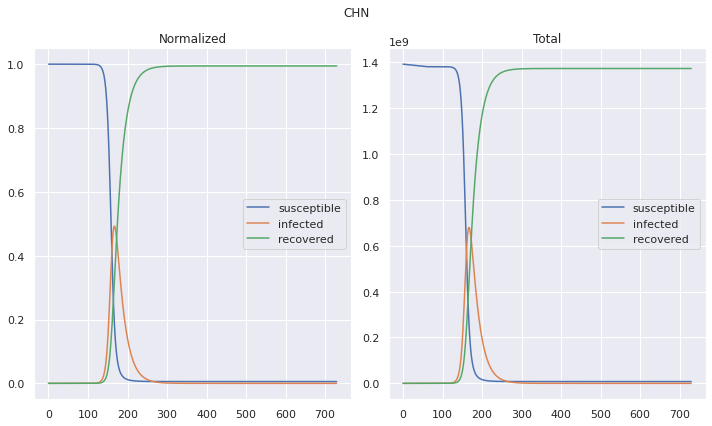

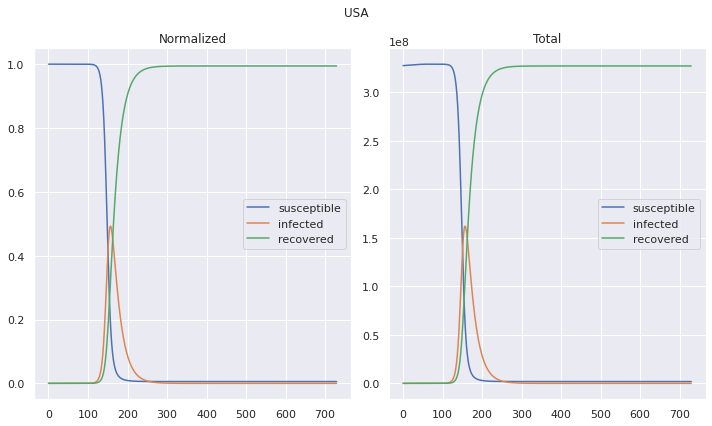

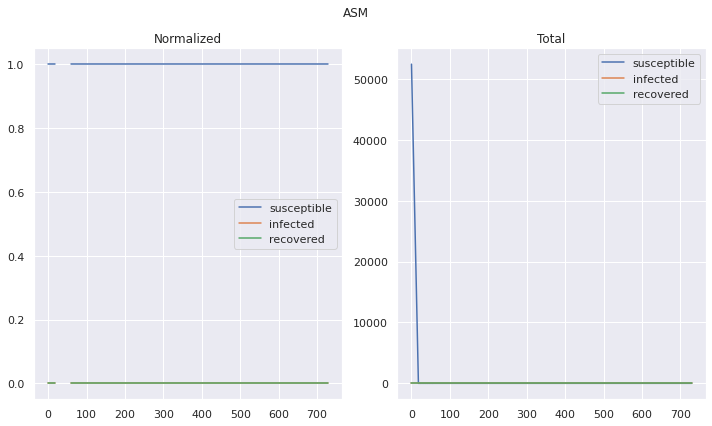

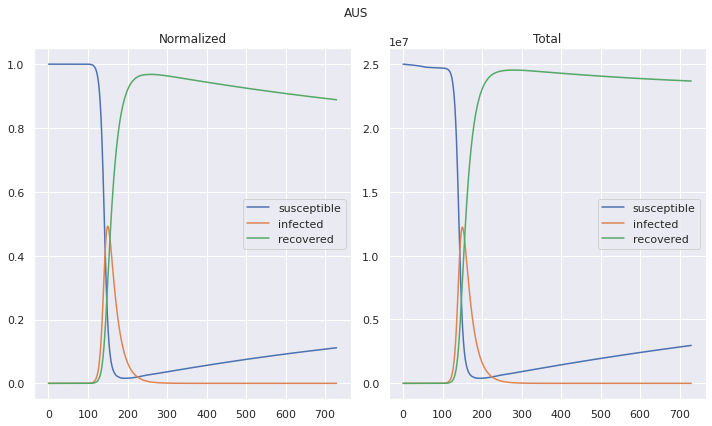

In [11]:
countries = [initial_country, 'FRA', 'CHN', 'USA', 'ASM', 'AUS']
idx = []

for country in countries:
    index = df_countries.loc[df_countries["country_code"]
                             == country].index.item()
    idx.append(index)

# idx = [168, 39]  # introduce los indices de los paises a consultar

for i, country in zip(idx, countries):
    fig, ax = plt.subplots(1, 2, figsize=(10, 6))
    ax[0].plot(SIR_p_t[i, 0, :], label='susceptible')
    ax[0].plot(SIR_p_t[i, 1, :], label='infected')
    ax[0].plot(SIR_p_t[i, 2, :], label='recovered')
    ax[0].set_title('Normalized')
    ax[0].legend()
    ax[1].plot(SIR_t[i, 0, :], label='susceptible')
    ax[1].plot(SIR_t[i, 1, :], label='infected')
    ax[1].plot(SIR_t[i, 2, :], label='recovered')
    ax[1].set_title('Total')
    ax[1].legend()
    fig.suptitle(country)
    plt.tight_layout()

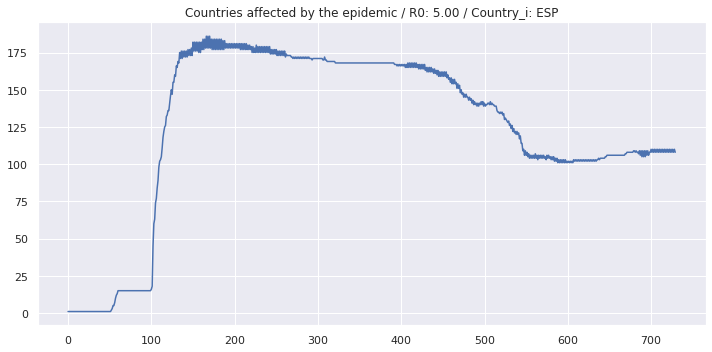

In [12]:
# para ver como evolucionan los paises afectados
affected = []
# for t in range(20,SIR_ncountry_t.shape[2]):
for t in range(T):
    idx = np.argwhere(SIR_t[:, 1, t] > 0.99)
    countries = set(df_countries.iloc[idx.flatten().tolist(), 0].values)
    #print('Day {} ->'.format(t), 'Cuntries affected: {}'.format(len(countries)))
    affected.append(len(countries))


fig, ax = plt.subplots(1, 1, figsize=(10, 5))
plt.plot(affected)
plt.title(
    'Countries affected by the epidemic / R0: {:.2f} / Country_i: {}'.format(R0, initial_country))
plt.tight_layout()